# Исследование надежности заемщиков.

Проверить как семейное положение и количество детей клиента влияет на факт погашения кредита в срок.

## Обзор данных

In [1]:
# импорт библиотек pandas и seaborn

import pandas as pd 
import seaborn as sns 

In [2]:
# чтение файла с данными и сохранение в df

df = pd.read_csv('/datasets/data.csv') 

df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В иследуемых данных встречаются пропуски, разный регистр у значений в столбце с образованием и отричательный стаж работы. Возможно, есть дубликаты и анамалии в данных.

## Предобработка данных

### Заполнение пропусков

In [4]:
df.isna().sum() # Находим столбцы с пропусками

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
df[df['days_employed'].isna()].head(10) # Первые 10 строк с пропусками в стаже работы

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [6]:
print(
    'Процент пропущенных значений: {:.0%}'.format(df['days_employed'].isna().sum() / len(df['days_employed']))
)

Процент пропущенных значений: 10%


Для заполнения пропусков лучше использовать медиану, так как некоторые значения сильно выделяются среди большинства и среднее арифметическое может сильно исказить конечный результат.

In [7]:
# Заполняем пропуски медианными значениями

df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())
df['total_income'] = df['total_income'].fillna(df['total_income'].median())

In [8]:
df.isna().sum() # Проверка результата

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Проверка данных на аномалии и исправления.

#### Редактирование столбца со стажем работы

In [9]:
# Количество строк, где стаж имеет положительное значение

df['days_employed'].loc[df['days_employed'] > 0].count()

3445

In [10]:
# Первые десять положительных значений столбца "days_employed"

df[df['days_employed'] > 0].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью
35,0,394021.072184,68,среднее,1,гражданский брак,1,M,пенсионер,0,77805.677436,на проведение свадьбы
50,0,353731.432338,63,среднее,1,женат / замужем,0,F,пенсионер,0,92342.730612,автомобили
56,0,370145.087237,64,среднее,1,вдовец / вдова,2,F,пенсионер,0,149141.043533,образование
71,0,338113.529892,62,среднее,1,женат / замужем,0,F,пенсионер,0,43929.696397,автомобили
78,0,359722.945074,61,высшее,0,женат / замужем,0,M,пенсионер,0,175127.646000,сделка с автомобилем


In [11]:
# Количество строк, где стаж более 100 лет

df['days_employed'].loc[df['days_employed'] > 36500].count()

3445

In [12]:
# Процент положительных значений стажа работы

print(
    '{:.0%}'.format((df['days_employed'].loc[df['days_employed'] > 0].count()) / len(df))
)

16%


В столбце со стажем изначально содержатся искаженные значения, большинство из них отрицательные, все положительные значения показывают стаж больее ста лет(возможно: ошибка программы, неправильный ввод и т.д.). Дальнейшее их использование может навредить анализу данных.

In [13]:
# Удаление столбца "days_employed"

df.drop(columns=['days_employed'], axis=1, inplace=True)

df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


#### Редактирование столбца с количеством детей

In [14]:
df['children'].value_counts() # Выводим все уникальные значения столбца 'children'

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В строках со значением 'children' = -1 заменяем значение на 1. Строки со значением 'children' = 20 лучше удалить, их количество незначительно относительно всего датафрейма, но прибавление их к строкам с большим количеством детей может исказить данные.

In [15]:
df.loc[df['children'] == -1, 'children'] = 1 # Замена значений -1 в столбце 'children' на 1
df['children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

In [16]:
df = df[df['children'] < 20] # Удаление строк со значением 20 в столбце 'children'
df['children'].value_counts()

0    14149
1     4865
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

#### Редактирование столбца 'gender'

In [17]:
df['gender'].value_counts() # Выводим все уникальные значения столбца 'gender'

F      14189
M       7259
XNA        1
Name: gender, dtype: int64

In [18]:
display(df[df['gender'] == 'XNA']) # Вывод строки с выпадающим значением

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


In [19]:
# Удаление строки с неизвестным значением и проверка результата

df = df[df['gender'] != 'XNA'] 

df['gender'].value_counts()

F    14189
M     7259
Name: gender, dtype: int64

#### Проверка на аномалии оставшихся столбцов

In [20]:
df['dob_years'].unique() # Вывод всех уникальных значений столбца "dob_years"

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

In [21]:
df['dob_years'][df['dob_years'] == 0].count() # Количество строк со значением возраста равным 0

100

Строки с нулевым значением возраста можно оставить без изменений, на конечный результат они не повлияют. Скорее всего, забыли указать возраст при вводе значений.

In [22]:
df['income_type'].value_counts() # Вывод всех уникальных значений столбца "income_type"

сотрудник          11076
компаньон           5062
пенсионер           3847
госслужащий         1457
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

### Изменение типов данных.

In [23]:
# Изменение типа данных в столбце с ежемесячным доходом

df['total_income'] = df['total_income'].astype('int')

df['total_income'].head()

0    253875
1    112080
2    145885
3    267628
4    158616
Name: total_income, dtype: int64

### Удаление дубликатов.

In [24]:
df['education'].unique() # Находим уникальные значения столбца 'education'

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [25]:
# Приведение к нижнему регистру значений столбца 'education'

df['education'] = df['education'].str.lower()
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [26]:
df.duplicated().sum() # Поиск дубликатов

71

In [27]:
# Удаление дубликатов

df = df.drop_duplicates().reset_index(drop=True) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21377 entries, 0 to 21376
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21377 non-null  int64 
 1   dob_years         21377 non-null  int64 
 2   education         21377 non-null  object
 3   education_id      21377 non-null  int64 
 4   family_status     21377 non-null  object
 5   family_status_id  21377 non-null  int64 
 6   gender            21377 non-null  object
 7   income_type       21377 non-null  object
 8   debt              21377 non-null  int64 
 9   total_income      21377 non-null  int64 
 10  purpose           21377 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [28]:
df.duplicated().sum() # Повторная проверка на дубликаты

0

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [29]:
# Создание датафрейма с уникальными значениями столбцов с семейным положением и их ID

df_family_status = df[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True) 

# Вывод всех значений

display(df_family_status)

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [30]:
# Создание датафрейма с уникальными значениями столбцов с уровнем образования и их ID

df_education = df[['education_id', 'education']].drop_duplicates().reset_index(drop=True) 

# Вывод всех значений

display(df_education)

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [31]:
# Удаление столбцов "family_status" и "education"

df.drop(columns=['family_status', 'education'], axis=1, inplace=True)

df.head()

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Категоризация дохода.

In [32]:
# Создание функции для категории дохода заемщика

def income(value):
    if value <= 30000:
        return 'E'
    if value <= 50000:
        return 'D'
    if value <= 200000:
        return 'C'
    if value <= 1000000:
        return 'B'
    if value > 1000000:
        return 'A'

In [33]:
# Добавление столбца с категорией дохода заемщика

df['total_income_category'] = df['total_income'].apply(income)

df.head(10)

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
5,0,27,0,1,M,компаньон,0,255763,покупка жилья,B
6,0,43,0,0,F,компаньон,0,240525,операции с жильем,B
7,0,50,1,0,M,сотрудник,0,135823,образование,C
8,2,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C
9,0,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C


In [34]:
df['total_income_category'].value_counts() # Проверка на присутствие всех категорий в датафрейме

C    15960
B     5020
D      350
A       25
E       22
Name: total_income_category, dtype: int64

### Категоризация целей кредита.

In [35]:
# Получение всех уникальных значений столбца "purpose"

df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [36]:
# Создание списков со схожими значениями

car, immovables, wedding, education = [], [], [], []

for i in df['purpose'].unique():
    if 'жил' in i or 'недвиж' in i:
        immovables.append(i)
    elif 'образован' in i:
        education.append(i)
    elif 'свадьб' in i:
        wedding.append(i)
    elif 'автом' in i:
        car.append(i)

# Проверка что все значения добавлены в списки

print(
    (len(car) + len(immovables) + len(wedding) + len(education)) == len(df['purpose'].unique())
)

True


In [37]:
# Создание функции для определения категории цели займа

def purpose_category(value):
    if value in car:
        return 'операции с автомобилем'
    if value in immovables:
        return 'операции с недвижимостью'
    if value in wedding:
        return 'проведение свадьбы'
    if value in education:
        return 'получение образования'

In [38]:
# Добавление столбца с категорией цели займа

df['purpose_category'] = df['purpose'].apply(purpose_category)

df.head(10)

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,50,1,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Выводы по предобработке данных

Предобработка обнаружила проблемы в данных:

- аномалии в стаже работы, гендере и возрасте
- пропущенные значения
- дубликаты

Все найденые проблемы исправили.

Создали несколько "словарей" с семейным положением и целями кредита.

Разделили по категориям значения дохода заемщика и заменили данные в исходном датафрейме.


## Ответы на вопросы.

### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

,count,sum,mean
,debt,debt,debt
children,,,
0,14090,1063,0.075444
1,4855,445,0.091658
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


<AxesSubplot:>

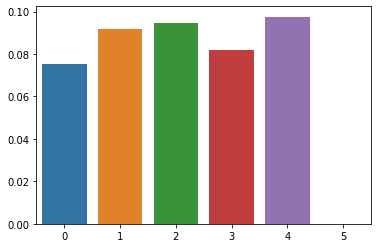

In [39]:
# Создание сводной таблицы зависимотсти задолженостей от количества детей

display(pd.pivot_table(df, index='children', values=['debt'], aggfunc=['count', 'sum', 'mean']))

# Построение диаграммы зависимости задолженостей от количества детей

x=list(df.groupby('children')['debt'].mean())
y = list(df['children'].unique())
y.sort()
sns.barplot(x=y, y=x)

### Вывод 1:

Процент возврта кредита везде примерно одинаковый, кроме последнего значения. А вот количество взятых кредитов существенно отличается, чем больше детей в семье, тем реже берутся кредиты.

### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [40]:
# Объединение нескольких таблиц и расчет метрик

df_family_status_debt_merge = (
    pd.pivot_table(
        df, index='family_status_id', values=['debt'], aggfunc=['count', 'sum', 'mean']
    )
)

df_family_status_debt_merge.columns = pd.MultiIndex.from_tuples(
    [('debt','count'), ('debt','sum'), ('debt','mean')]
)

df_family_status_debt_merge = df_family_status.join(
    df_family_status_debt_merge, how='left'
)

df_family_status_debt_merge.columns = pd.MultiIndex.from_tuples(
    [
        ('family_status_id',''),
        ('family_status', ''),
        ('debt','count'),
        ('debt','sum'),
        ('debt','mean')
    ]
)

display(df_family_status_debt_merge)

/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


family_status_id          family_status   debt               
                                           count  sum      mean
0                0        женат / замужем  12290  928  0.075509
1                1       гражданский брак   4138  385  0.093040
2                2         вдовец / вдова    955   63  0.065969
3                3              в разводе   1193   84  0.070411
4                4  Не женат / не замужем   2801  273  0.097465

<AxesSubplot:>

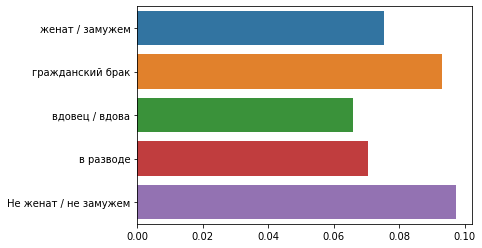

In [41]:
# Среднее значение по категориям семейного положения

df_family_status_debt = df.groupby('family_status_id')['debt'].mean()
df_family_status_debt = df_family_status.join(df_family_status_debt)

sns.barplot(y=list(df_family_status_debt['family_status']), x=list(df_family_status_debt['debt']))

In [42]:
df_children_family_status = df.merge(df_family_status)

# количество кредитов с разбивкой по семейному положению и количеству детей

display(pd.pivot_table(df_children_family_status,
    index='family_status',
    columns='children',
    values=['debt'],
    aggfunc='count'
    )
)

debt                                  
children                    0       1       2      3     4    5
family_status                                                  
Не женат / не замужем  2262.0   454.0    75.0    8.0   2.0  NaN
в разводе               784.0   316.0    81.0   11.0   1.0  NaN
вдовец / вдова          847.0    81.0    20.0    6.0   1.0  NaN
гражданский брак       2729.0  1000.0   343.0   56.0   8.0  2.0
женат / замужем        7468.0  3004.0  1533.0  249.0  29.0  7.0

In [43]:
# среднее значение по должникам 

display(pd.pivot_table(df_children_family_status,
    index='family_status',
    columns='children',
    values=['debt'],
    aggfunc='mean'
    )
)

debt                                             
children                      0         1         2         3         4    5
family_status                                                               
Не женат / не замужем  0.092838  0.114537  0.120000  0.125000  0.500000  NaN
в разводе              0.070153  0.066456  0.086420  0.090909  0.000000  NaN
вдовец / вдова         0.062574  0.086420  0.150000  0.000000  0.000000  NaN
гражданский брак       0.083914  0.118000  0.087464  0.142857  0.000000  0.0
женат / замужем        0.069095  0.082224  0.094586  0.068273  0.103448  0.0

<AxesSubplot:xlabel='None-children', ylabel='family_status'>

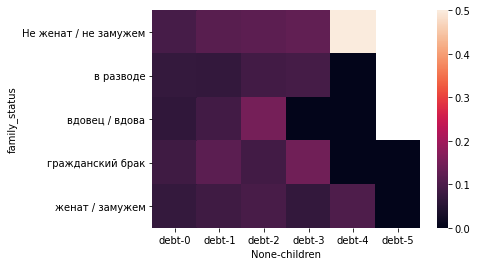

In [44]:
sns.heatmap(pd.pivot_table(df_children_family_status,
    index='family_status',
    columns='children',
    values=['debt'],
    aggfunc='mean'
    )
)

### Вывод 2:

В браке люди берут больше кредитов, а после брака берут меньше кредитов и реже имеют по ним долги.

### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [45]:
display(
    pd.pivot_table(
        df, index='total_income_category',
        values=['debt'],
        aggfunc=['count', 'sum', 'mean']
    )
)

,count,sum,mean
,debt,debt,debt
total_income_category,,,
A,25,2,0.080000
B,5020,354,0.070518
C,15960,1354,0.084837
D,350,21,0.060000
E,22,2,0.090909


<AxesSubplot:>

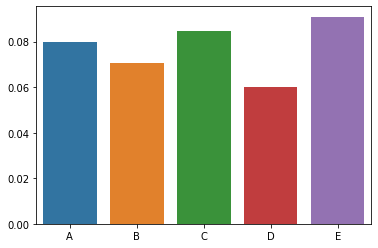

In [46]:
x = list(df['total_income_category'].unique())
x.sort()

# Среднее значение по категориям дохода

y=list(df.groupby('total_income_category')['debt'].mean())

sns.barplot(y = y, x = x)

### Вывод 3:

Люди со средним уровнем дохода чаще имеют задолжености по кредитам. В крайних категориях мало значений для анализа, скорее всего люди в них редко берут кредиты.

### Вопрос 4:Как разные цели кредита влияют на его возврат в срок?

In [47]:
display(
    df.pivot_table(
        index='purpose_category',
        values=['debt'],
        aggfunc=['count', 'sum', 'mean']
    )
)

,count,sum,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4290,401,0.093473
операции с недвижимостью,10774,780,0.072397
получение образования,3998,369,0.092296
проведение свадьбы,2315,183,0.079050


<AxesSubplot:>

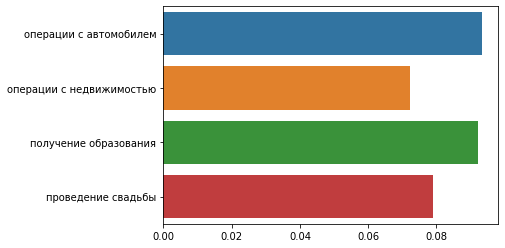

In [48]:
y = list(df['purpose_category'].unique())
y.sort()

x=list(df.groupby('purpose_category')['debt'].mean())

sns.barplot(y = y, x = x)

### Вывод 4:

В автокредитах и кредитах на образование чаще встречаются должники.

## Общий вывод:

1. Семьи с детьми хорошо платят по кредитам и являются одними из самых часто встречающихся заемщиков.
2. Люди с очень высоким доходом и с очень низким доходом редко берут кредиты. Первым он врядли нужен, вторые не смогут его погасить.
3. Самая частая цель кредита покупка недвижимости и с хорошей статистикой по возвратам кредитов.
    
